# The Sparks Foundation: GRIP

# Data Science and Business Analytics Internship

# Author's Name: S S Sharat Chandra Gubbala

# #GRIPOCTOBER23

# Task-1: Prediction Using Supervised Machine Learning

In this task, We will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. We will be using the data given available at this site location: http://bit.ly/w-data 

# Importing Modules

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and Analysis of Data

In [15]:
Given_data = pd.read_csv('http://bit.ly/w-data')

In [16]:
Given_data.shape

(25, 2)

In [17]:
Given_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [18]:
Given_data.head

<bound method NDFrame.head of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [19]:
Given_data.tail

<bound method NDFrame.tail of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [20]:
Given_data.dtypes

Hours     float64
Scores      int64
dtype: object

Checking for any missing values 

In [23]:
Given_data.isna().sum()

Hours     0
Scores    0
dtype: int64

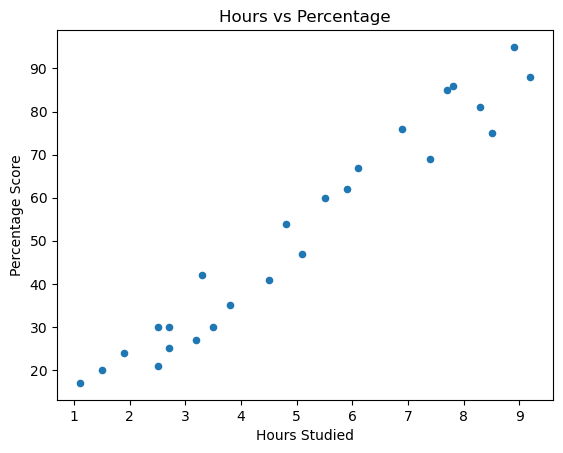

In [27]:
Given_data.plot(kind = 'scatter', x = 'Hours', y = 'Scores')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [26]:
Given_data.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [30]:
hours = Given_data['Hours']
scores = Given_data['Scores']

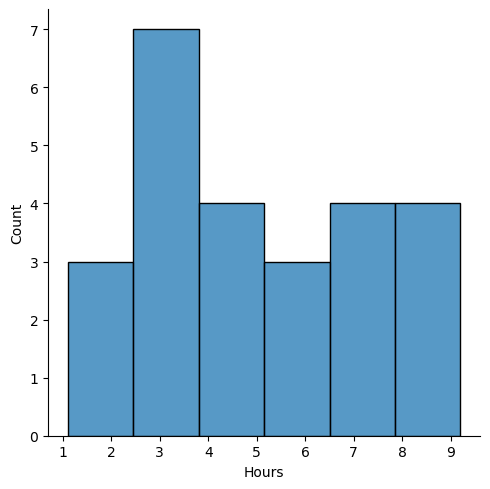

In [31]:
sns.displot(hours)

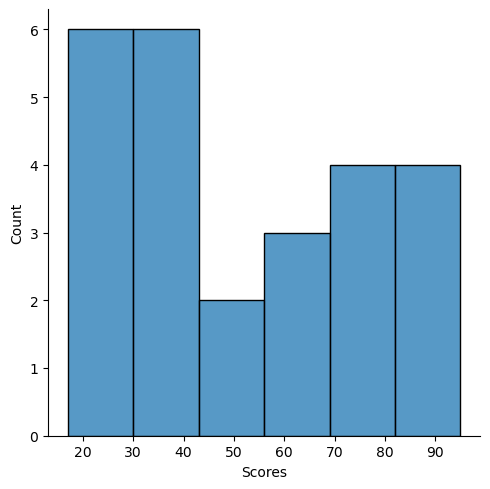

In [32]:
sns.displot(scores)

# Application of Linear Regression Algorithm

Preparation of Data

In [34]:
X = Given_data.iloc[:, :-1].values  
y = Given_data.iloc[:, 1].values

In [35]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.25, random_state=0) 

Training the Algorithm

In [36]:
from sklearn.linear_model import LinearRegression  
LR1 = LinearRegression()  
LR1.fit(X_train, y_train) 

LinearRegression()

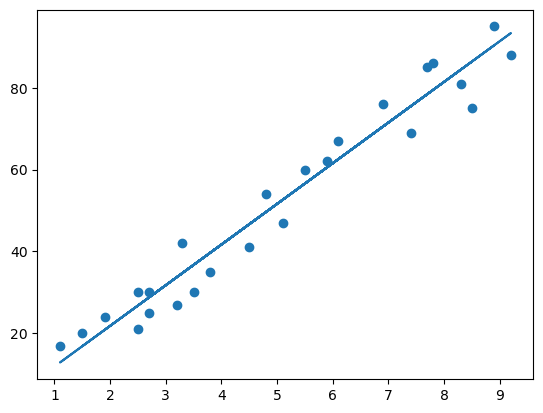

In [39]:
line = LR1.coef_*X+LR1.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Making Predictions

In [52]:
print(X_test) # Printing Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [53]:
y_pred_LR1 = LR1.predict(X_test)

In [55]:
print(y_pred_LR1)

[16.84472176 33.74557494 75.50062397 26.7864001  60.58810646 39.71058194
 20.8213931 ]


In [56]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_LR1})  
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


What would be the predicted score if a student studies for 9.25 hours per day (9.25/day) ?

In [57]:
H1 = 9.25
RP1 = LR1.predict([[H1]])

In [58]:
print("No of Hours = {}".format(H1))

No of Hours = 9.25


In [59]:
print("if a student studies for {} hours per day, the score predicted would be {}%".format(H1, RP1))

if a student studies for 9.25 hours per day, the score predicted would be [93.89272889]%


# Model Evaluation

In [60]:
from sklearn import metrics

In [64]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_LR1))

Mean Absolute Error: 4.130879918502486
